# Tutorial 1

I am just coding the following to be familiarize with one of the approch to classsify land use land cover from satellite EuroSAT: https://www.kaggle.com/nilesh789/land-cover-classification-with-eurosat-dataset

# Reading Dataset

In [38]:
import os
#os.chdir(r"C:\Users\said_\Google Drive\THE CITY COLLEGE OF NEW YORK\Ph.D.Classes\Spring21\Neural Networks\Project\Tutorial_1")
os.chdir(r'/home/said.mejia/Projects/Deep_Learning/Dataset')
dataset = r'Euro_SAT_RGB'
labels = os.listdir(dataset)
print(labels)

['Pasture', 'AnnualCrop', 'PermanentCrop', 'Highway', 'Residential', 'Industrial', 'SeaLake', 'HerbaceousVegetation', 'River', 'Forest']


# Exploratory Data Analysis

## Some Histograms to look at the distribution of the dataset

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

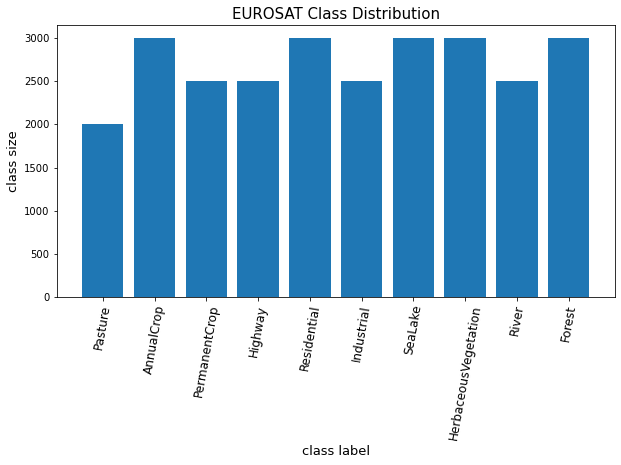

In [40]:
counts = {}

for l in labels:
    counts[l] = len(os.listdir(os.path.join(dataset, l))) # to count numbers of files inside each folder

    
plt.figure(figsize=(10, 5))

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()), fontsize=12, rotation=80)
plt.xlabel('class label', fontsize=13)
plt.ylabel('class size', fontsize=13)
plt.title('EUROSAT Class Distribution', fontsize=15)
plt.show()

There are 10 classes of land use land cover

## Showing some figures

In [41]:
import PIL # pillow - image processing

In [42]:
# Reading figures ended in 1000 and 2000
img_paths = [os.path.join(dataset, l, l + '_1.jpg') for l in labels]
img_paths = img_paths + [os.path.join(dataset, l, l + '_2.jpg') for l in labels]
print(len(img_paths))
img_paths

20


['Euro_SAT_RGB/Pasture/Pasture_1.jpg',
 'Euro_SAT_RGB/AnnualCrop/AnnualCrop_1.jpg',
 'Euro_SAT_RGB/PermanentCrop/PermanentCrop_1.jpg',
 'Euro_SAT_RGB/Highway/Highway_1.jpg',
 'Euro_SAT_RGB/Residential/Residential_1.jpg',
 'Euro_SAT_RGB/Industrial/Industrial_1.jpg',
 'Euro_SAT_RGB/SeaLake/SeaLake_1.jpg',
 'Euro_SAT_RGB/HerbaceousVegetation/HerbaceousVegetation_1.jpg',
 'Euro_SAT_RGB/River/River_1.jpg',
 'Euro_SAT_RGB/Forest/Forest_1.jpg',
 'Euro_SAT_RGB/Pasture/Pasture_2.jpg',
 'Euro_SAT_RGB/AnnualCrop/AnnualCrop_2.jpg',
 'Euro_SAT_RGB/PermanentCrop/PermanentCrop_2.jpg',
 'Euro_SAT_RGB/Highway/Highway_2.jpg',
 'Euro_SAT_RGB/Residential/Residential_2.jpg',
 'Euro_SAT_RGB/Industrial/Industrial_2.jpg',
 'Euro_SAT_RGB/SeaLake/SeaLake_2.jpg',
 'Euro_SAT_RGB/HerbaceousVegetation/HerbaceousVegetation_2.jpg',
 'Euro_SAT_RGB/River/River_2.jpg',
 'Euro_SAT_RGB/Forest/Forest_2.jpg']

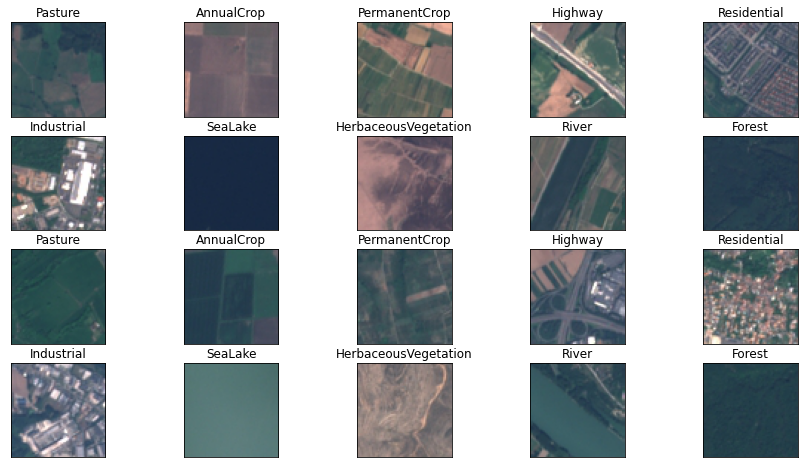

In [43]:
def plot_sat_imgs(paths):
    plt.figure(figsize = (15, 8))
    for i in range(20):
        plt.subplot(4, 5, i+1, xticks = [], yticks = [])
        img = PIL.Image.open(paths[i], 'r')
        plt.imshow(np.asarray(img))
        plt.title(paths[i].split("/")[-2]) #s / pc '\\'
plot_sat_imgs(img_paths)

## Showing the distribution of the RGB for figures ended in 1000

In [44]:
from skimage import io

In [45]:
def plot_img_histogram(img_path):
    image = io.imread(img_path)
    plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    plt.xlabel('Intensity')
    plt.ylabel('Count')
    plt.title(img_path.split('/')[-2])
    plt.show()

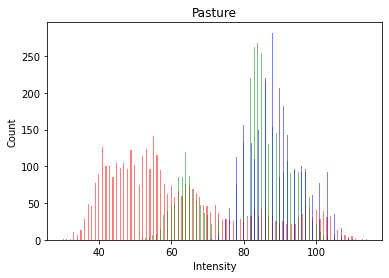

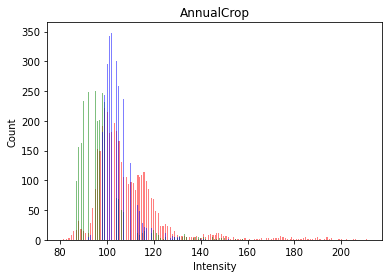

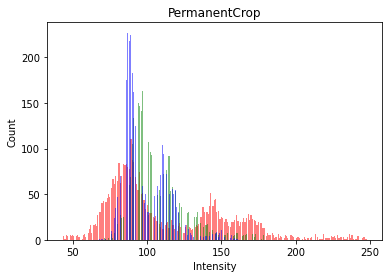

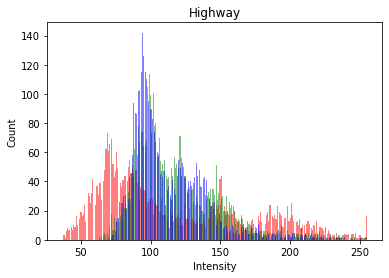

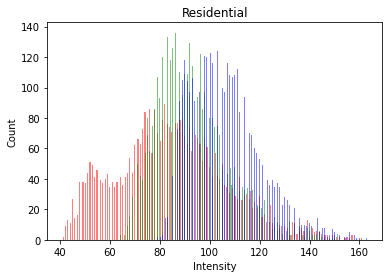

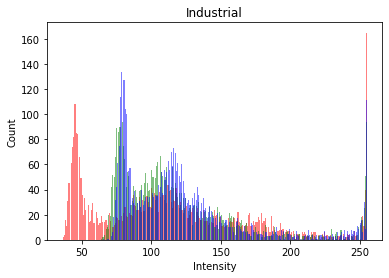

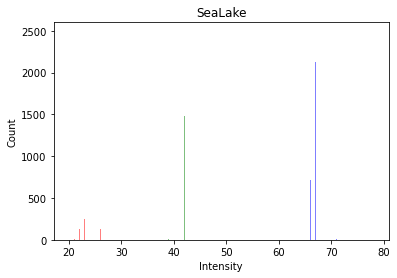

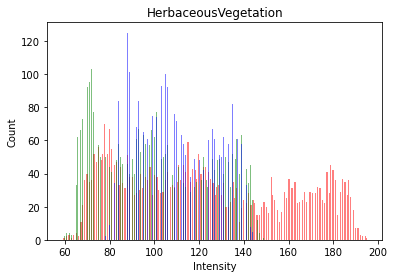

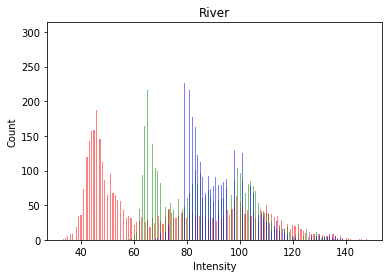

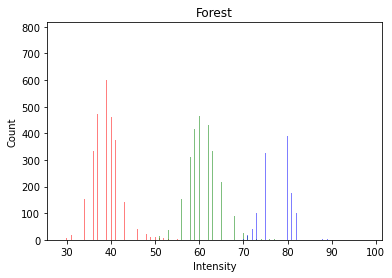

In [46]:
for l in labels:
    path = os.path.join(dataset, l, l+'_1.jpg')
    plot_img_histogram(path)

# Training and Test Dataset

## Spliting Dataset

Splitting the dataset into 80% and 20% respectively, and saving them into 2 different folders (training_dataset,testing_dataset)

In [47]:
import re
from sklearn.model_selection import StratifiedShuffleSplit
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm # library's name: te quiero demasiado
import shutil # support file copying and removal

In [48]:
train_dir = 'training_dataset_60'
test_val_dir = 'test_val_dataset_40'
test_dir = 'testing_dataset_20'
val_dir = 'validation_dataset_20'
batch_size = 128
num_classes =len(labels)
input_shape = (64, 64, 3)
class_mode = 'categorical'

### Defining the train size (60 percent) and the separating the other 40 to slit into testing and validation dataset

In [49]:
# create training and testing directories
for path in (train_dir, test_val_dir):
    if not os.path.exists(path):
        os.mkdir(path)

# create class label subdirectories in train and test (SUBFOLDERS)
for l in labels:
    if not os.path.exists(os.path.join(train_dir, l)):
        os.mkdir(os.path.join(train_dir, l))
    if not os.path.exists(os.path.join(test_dir, l)):
        os.mkdir(os.path.join(test_val_dir, l))

In [50]:
# map each image path to their class label in 'data'
data = {}

for l in labels:
    for img in os.listdir(dataset+'/'+l):
        data.update({os.path.join(dataset, l, img): l})

X = pd.Series(list(data.keys()))
y = pd.get_dummies(pd.Series(data.values()))

split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=69)

# split the list of image paths
for train_idx, test_val_idx in split.split(X, y):
    
    train_paths = X[train_idx]
    test_paths = X[test_val_idx]
    # define a new path for each image depending on training or testing
    new_train_paths = [re.sub(r'Euro_SAT_RGB', 'training_dataset_60', i) for i in train_paths]
    new_test_paths = [re.sub(r'Euro_SAT_RGB', 'test_val_dataset_40', i) for i in test_paths]

    train_path_map = list((zip(train_paths, new_train_paths)))
    test_path_map = list((zip(test_paths, new_test_paths)))
    
    # move the files
    print("moving training files..")
    for i in tqdm(train_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training_60', 'testing_40', i[1])):
                shutil.copy(i[0], i[1])
    
    print("moving testing files..")
    for i in tqdm(test_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('training_60', 'testing_40', i[1])):
                shutil.copy(i[0], i[1])

 14%|█▍        | 2310/16200 [00:00<00:00, 20941.20it/s]

moving training files..


 40%|████      | 4324/10800 [00:00<00:00, 36228.14it/s]

moving testing files..


100%|██████████| 10800/10800 [00:00<00:00, 35787.49it/s]


### Defining the testing and validation size 50/50 from the 40 percent

In [51]:
# create training and testing directories
for path in (test_dir, val_dir):
    if not os.path.exists(path):
        os.mkdir(path)

# create class label subdirectories in train and test (SUBFOLDERS)
for l in labels:
    if not os.path.exists(os.path.join(test_dir, l)):
        os.mkdir(os.path.join(test_dir, l))
    if not os.path.exists(os.path.join(val_dir, l)):
        os.mkdir(os.path.join(val_dir, l))

In [52]:
# map each image path to their class label in 'data'
data = {}

for l in labels:
    for img in os.listdir('test_val_dataset_40'+'/'+l):
        data.update({os.path.join('test_val_dataset_40', l, img): l})

X = pd.Series(list(data.keys()))
y = pd.get_dummies(pd.Series(data.values()))

split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=69)

# split the list of image paths
for train_idx, test_idx in split.split(X, y):
    
    train_paths = X[train_idx]
    test_paths = X[test_idx]
    # define a new path for each image depending on training or testing
    new_train_paths = [re.sub(r'test_val_dataset_40', 'testing_dataset_20', i) for i in train_paths]
    new_test_paths = [re.sub(r'test_val_dataset_40', 'validation_dataset_20', i) for i in test_paths]

    train_path_map = list((zip(train_paths, new_train_paths)))
    test_path_map = list((zip(test_paths, new_test_paths)))
    
    # move the files
    print("moving training files..")
    for i in tqdm(train_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('testing_20', 'validation_20', i[1])):
                shutil.copy(i[0], i[1])
    
    print("moving testing files..")
    for i in tqdm(test_path_map):
        if not os.path.exists(i[1]):
            if not os.path.exists(re.sub('testing_20', 'validation_20', i[1])):
                shutil.copy(i[0], i[1])

100%|██████████| 5400/5400 [00:00<00:00, 33268.81it/s]

moving training files..
moving testing files..



100%|██████████| 5400/5400 [00:00<00:00, 35427.08it/s]


In [53]:
train_paths

9892           test_val_dataset_40/Forest/Forest_2570.jpg
1338    test_val_dataset_40/AnnualCrop/AnnualCrop_165.jpg
9054              test_val_dataset_40/River/River_239.jpg
7728    test_val_dataset_40/HerbaceousVegetation/Herba...
7850    test_val_dataset_40/HerbaceousVegetation/Herba...
                              ...                        
5932    test_val_dataset_40/Industrial/Industrial_2469...
4611    test_val_dataset_40/Residential/Residential_12...
6748         test_val_dataset_40/SeaLake/SeaLake_2897.jpg
8798              test_val_dataset_40/River/River_660.jpg
3195         test_val_dataset_40/Highway/Highway_2373.jpg
Length: 5400, dtype: object

In [54]:
# Create a ImageDataGenerator Instance which can be used for data augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
#   validation_split=0.2
)

train_generator = train_gen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode=class_mode,
    #subset='training',
    color_mode='rgb',
    shuffle=True,
    seed=69
)

# test generator for evaluation purposes with no augmentations, just rescaling
test_gen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=69
)
# validation generator for evaluation purposes with no augmentations, just rescaling
vali_gen = ImageDataGenerator(
    rescale=1./255,
)

vali_generator = vali_gen.flow_from_directory(
    directory=val_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=69
)

Found 16200 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [55]:
# Looking at the indices
print(train_generator.class_indices)

{'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [56]:
np.save('class_indices', train_generator.class_indices)

In [57]:
train_gen

# Machine Learning for Image Classification (Delete this section)

In [ ]:
# Using image data generator api in keras for making image dataset 
rf_gen = ImageDataGenerator(rescale=1./255)

rf_train_generator = rf_gen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64),
    # by using batch_size as training data size we can extract data from this iterator
    batch_size=16200, 
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=7
)

rf_test_generator = rf_gen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=5400,
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=7
)
rf_test_generator = rf_gen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=5400,
    class_mode=class_mode,
    color_mode='rgb',
    shuffle=False,
    seed=7
)

Some notes:
- Each image as the shape of 64x64x3 (dpx-dpx-(RGB)) = 12288 - see bellow

In [ ]:
img = PIL.Image.open(img_paths[1], 'r')
img.size

In [ ]:
train = train_generator.next()
X_train = train[0].reshape(16200, 12288)
y_train = train[1]

test = test_generator.next()
X_test = test[0].reshape(5400, 12288)
y_test = test[1]

val = vali_generator.next()
X_val = test[0].reshape(5400, 12288)
y_val = test[1]

In [ ]:
train[0].shape

# Importing useful Libraries and Setting up the GPU

In [58]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam


from keras.applications import VGG16, VGG19
from keras.applications import ResNet50, ResNet50V2, ResNet152V2
from keras.applications import InceptionV3, Xception

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, fbeta_score, accuracy_score

In [59]:
gpus = tf.config.experimental.list_physical_devices('CPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'CPU')
    logical_gpus = tf.config.experimental.list_logical_devices('CPU')
    print(len(gpus), "Physical CPUs,", len(logical_gpus), "Logical CPU")    
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
tf.config.set_soft_device_placement(True)

1 Physical CPUs, 1 Logical CPU


# ResNet50 Function

In [60]:
def compile_model(input_shape, n_classes, optimizer, fine_tune=None):
    conv_base = ResNet50(include_top=False,
                                 weights='imagenet', 
                                 input_shape=input_shape)
    top_model = conv_base.output
    top_model = Flatten()(top_model)
    top_model = Dense(2048, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    model = Model(inputs=conv_base.input, outputs=output_layer)
            
    if type(fine_tune) == int:
        for layer in conv_base.layers[fine_tune:]:
            layer.trainable = True
    else:
        for layer in conv_base.layers:
            layer.trainable = False
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                 metrics=['categorical_accuracy'])
    
    return model

# History Function

In [61]:
def plot_history(history):
       
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.show();

# Displaying the results Function

In [62]:
def display_results(y_true, y_preds, class_labels):
    
    results = pd.DataFrame(precision_recall_fscore_support(y_true, y_preds),
                          columns=class_labels).T
    results.rename(columns={0: 'Precision',
                           1: 'Recall',
                           2: 'F-Score',
                           3: 'Support'}, inplace=True)
    
    conf_mat = pd.DataFrame(confusion_matrix(y_true, y_preds), 
                            columns=class_labels,
                            index=class_labels)    
    f2 = fbeta_score(y_true, y_preds, beta=2, average='micro')
    accuracy = accuracy_score(y_true, y_preds)
    print(f"Accuracy: {accuracy}")
    print(f"Global F2 Score: {f2}")    
    return results, conf_mat

# Plot Prediction Function

In [63]:
def plot_predictions(y_true, y_preds, test_generator, class_indices):

    fig = plt.figure(figsize=(20, 10))
    for i, idx in enumerate(np.random.choice(test_generator.samples, size=20, replace=False)):
        ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(test_generator[idx]))
        pred_idx = np.argmax(y_preds[idx])
        true_idx = y_true[idx]
                
        plt.tight_layout()
        ax.set_title("{}\n({})".format(class_indices[pred_idx], class_indices[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))   

# Running the ResNet50 Model

In [64]:
resnet50_model = compile_model(input_shape, num_classes, Adam(lr=1e-2), fine_tune=None)
resnet50_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

###  Making some Callbacks to storage the parameters

In [65]:
from datetime import datetime
start = datetime.now()

train_generator.reset()
vali_generator.reset()

N_STEPS = train_generator.samples//batch_size
N_VAL_STEPS = vali_generator.samples//batch_size
N_EPOCHS = 100

# model callbacks
checkpoint = ModelCheckpoint(filepath='model_weights_best.hdf5',
                        monitor='val_categorical_accuracy',
                        save_best_only=True,
                        verbose=1)

early_stop = EarlyStopping(monitor='val_categorical_accuracy',
                           patience=10,
                           restore_best_weights=True,
                           mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.5,
                              patience=3, min_lr=0.00001)
end = datetime.now()
print("\nTime Taken for testing: %s" % (end-start))


Time Taken for testing: 0:00:00.000418


In [ ]:
# First Pretraining the dense layer
start = datetime.now()
resnet50_history = resnet50_model.fit_generator(train_generator,
                             steps_per_epoch=N_STEPS,
                             epochs=50,
                             callbacks=[early_stop, checkpoint],
                             validation_data=vali_generator,
                             validation_steps=N_VAL_STEPS)
end = datetime.now()
print("\nTime Taken for testing: %s" % (end-start))

/home/said.mejia/anaconda3/envs/r_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
126/126 [==============================] - 500s 4s/step - loss: 5.2829 - categorical_accuracy: 0.1490 - val_loss: 1.7501 - val_categorical_accuracy: 0.3354

Epoch 00001: val_categorical_accuracy improved from -inf to 0.33538, saving model to model_weights_best.hdf5
Epoch 2/50
126/126 [==============================] - 408s 3s/step - loss: 1.8193 - categorical_accuracy: 0.2996 - val_loss: 1.6494 - val_categorical_accuracy: 0.3754

Epoch 00002: val_categorical_accuracy improved from 0.33538 to 0.37537, saving model to model_weights_best.hdf5
Epoch 3/50
126/126 [==============================] - ETA: 0s - loss: 1.7708 - categorical_accuracy: 0.3085

In [ ]:
# re-train whole network end2end 
resnet50_model = compile_model(input_shape, num_classes, Adam(lr=1e-4), fine_tune=0)

resnet50_model.load_weights('model_weights_best.hdf5')

train_generator.reset()
test_generator.reset()

resnet50_history = resnet50_model.fit_generator(train_generator,
                             steps_per_epoch=N_STEPS,
                             epochs=N_EPOCHS,
                             callbacks=[early_stop, checkpoint, reduce_lr],
                             validation_data=vali_generator,
                             validation_steps=N_VAL_STEPS)

# looking the results

In [ ]:
plot_history(resnet50_history)

In [ ]:
resnet50_model.load_weights('model_weights_best.hdf5')

class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

test_generator_new = test_gen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    batch_size=1,
    class_mode=None,
    color_mode='rgb',
    shuffle=False,
    seed=69
)

predictions = resnet50_model.predict_generator(test_generator_new, steps=len(test_generator_new.filenames))
predicted_classes = np.argmax(np.rint(predictions), axis=1)
true_classes = test_generator_new.classes

prf, conf_mat = display_results(true_classes, predicted_classes, class_indices.values())
prf

In [ ]:
conf_mat

In [ ]:
# Save the model and the weights
resnet50_model.save('ResNet50_eurosat.h5')

# Predicting Big image

In [ ]:
# Importing the modules
from datetime import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K
import numpy as np
import rasterio
import sys
print("Modules Loaded Successfully @ %s" % datetime.now())

# Loading the data and model
#IMG = "Testing_satellite_image\Sentinel_testing_image\Sentinel_imahe_RBG_234_Bands_Clipped.tif"
IMG = "Testing_satellite_image\Sentinel_testing_image\Sentinel_imahe_RBG_234_Bands_smaller_area_Clipped.tif"
MODEL = "ResNet50_eurosat.h5"
BANDS = (1, 2, 3)

In [ ]:
# Read the Data and Model
test_img = rasterio.open(IMG).read(BANDS)
test_img.shape

In [ ]:
# Cutting the image

In [ ]:
# Pad the image
test_img = np.pad(test_img, ((0, 0), (32, 32), (32, 32)), mode="empty")
test_img.shape

In [ ]:



# Test the Image

ROWS = test_img.shape[1]
COLS = test_img.shape[2]

# Load the model one time
LuLcModel = tf.keras.models.load_model(MODEL)

prediction_file = open("predictions.txt", "w")
for i in range(383, ROWS):

    predictions = []
    print("Processing Row: %s @ %s" % (i, datetime.now()))
    for j in range(COLS):
               
        # Create tile
        tile = ((i, i+64), (j, j+64))
        tile_img = test_img[:, i:i+64, j:j+64]

        # Predict
        predicted = LuLcModel.predict(tile_img.reshape(1, 64, 64, 3).astype('float16'))
        predictions.append(str(predicted.argmax()))

        # Optimization        
        del tile_img, predicted
        K.clear_session()
    
    # Flush the predictions of row to file
    prediction_file.write(("%s," % i) + ",".join(predictions) + "\n")
    prediction_file.flush()
    sys.stdout.flush()

    # Optimization
    if i % 10 == 0:
        del LuLcModel
        K.clear_session()
        LuLcModel = tf.keras.models.load_model(MODEL)

end = datetime.now()
print("\nTime Taken for testing: %s" % (end-start))
prediction_file.close()

In [ ]:
tile_img.shape

In [ ]:
PREDICTIONS = "predictions.txt"
classes = {0: 'AnnualCrop', 1: 'Forest', 2: 'HerbaceousVegetation', 3: 'Highway', 
           4: 'Industrial', 5: 'Pasture', 6: 'PermanentCrop', 
           7: 'Residential', 8: 'River', 9: 'SeaLake'}


# Read the Predictions file
rows = {}
with open(PREDICTIONS) as data:
    for row in data:
        values = [int(i) for i in row.split(",")]
        rows[values[0]] = values[1:]
predicted_img = np.array([*rows.values()])


# Write as a raster
with rasterio.open(IMG) as src_dataset:
    
    test_img = src_dataset.read((1, 2, 3))
    kwds = src_dataset.profile
    kwds['count'] = 1          # Changing the no. of bands to 1
    kwds['dtype'] = 'int32'    # Changing the datatype
   
    with rasterio.open('precitions.tif', 'w', **kwds) as dst_dataset:
        dst_dataset.write(predicted_img, 1)


# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Test image plot
test_img = ((test_img / (2**12-1)) * 255).astype('uint8')
img1 = ax1.imshow(np.transpose(test_img, (1, 2, 0)))
plt.colorbar(img1, ax=ax1, fraction=0.046, pad=0.04)
ax1.set_title("Test image (in 8-bit)")

# Predicted plot
img2 = ax2.imshow(predicted_img)
cbar = plt.colorbar(img2, fraction=0.046, pad=0.04)
cbar.ax.set_yticklabels(classes.values())
ax2.set_title("Predicted raster (ResNet50)")

# Display the plot
plt.show()